In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"F:\csv files\tesla.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
cor_data=data.drop(["Date"],axis=1)

In [8]:
data_corr=cor_data.corr()
data_corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999578,0.999566,0.999054,0.999054,0.457938
High,0.999578,1.000000,0.999490,0.999631,0.999631,0.466999
Low,0.999566,0.999490,1.000000,0.999580,0.999580,0.448387
Close,0.999054,0.999631,0.999580,1.000000,1.000000,0.458157
Adj Close,0.999054,0.999631,0.999580,1.000000,1.000000,0.458157
Volume,0.457938,0.466999,0.448387,0.458157,0.458157,1.000000


<Axes: >

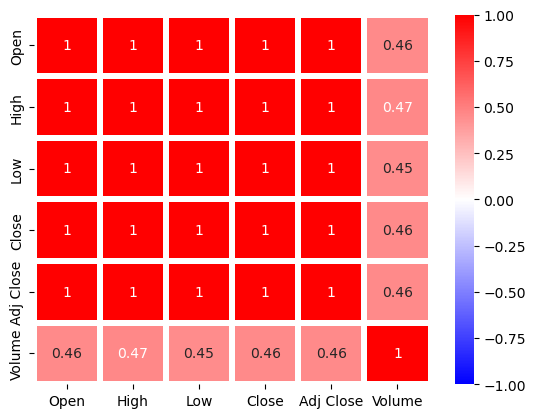

In [9]:
import seaborn as sns
sns.heatmap(data_corr,vmax=1,vmin=-1,annot=True,linewidth=4,cmap='bwr')

In [10]:
actual=data['Close']

In [12]:
x= np.array(data.index).reshape(-1,1)
data2=data.drop('Close',axis=1)

In [13]:
data_list=list(data2.columns)
data_list

['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']

In [14]:
data2.columns

Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,actual,test_size=0.33,random_state=42)

In [16]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x,actual,test_size=0.27,random_state=42)

In [17]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x,actual,test_size=0.22,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [19]:
reg.fit(x_train,y_train)

LinearRegression()

In [20]:
reg2 = LinearRegression()
reg2.fit(x_train2,y_train2)


LinearRegression()

In [21]:
reg3 = LinearRegression()
reg3.fit(x_train3,y_train3)

LinearRegression()

In [22]:
pred=reg.predict(x_test)
pred

array([ 55.44586994,  80.27376024, 198.83960367,  26.56444654,
       226.20095215, 143.61021506,  51.89902847,  38.55614866,
        19.30186639,   7.81685592,   9.67472526,  -4.1748462 ,
       153.74404783, 300.51572581, 236.16588771, 324.83692446,
       341.38885132, 290.71968746, 192.42150958, 244.77964556,
       151.21058964,  95.81230382, 342.06444017, 109.9996697 ,
       322.64126069, 116.24886658, 179.07862976, 180.09201304,
        80.78045187,  79.93596581, 120.13350247,  42.77857898,
       157.62868373,  45.14313996, 156.27750602, 246.13082327,
        76.72691877, 222.99190511, 128.07167148, 149.52161751,
       179.41642419,  61.86396403, 135.67204605, 117.9378387 ,
       204.75100612, 131.28071852, 157.79758094, 106.79062265,
        13.55936115,  66.08639435, 245.96192605, 242.41508458,
       334.12627117, 255.42016998,  94.46112612, 196.98173432,
       297.13778155, 244.44185114, 279.74136863,  89.73200416,
        45.6498316 , 295.111015  ,   7.14126707, 118.61

In [23]:
pred2=reg2.predict(x_test2)

In [24]:
pred3=reg3.predict(x_test3)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8687654977642258

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test2,pred2)

0.8643247578026054

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test3,pred3)

0.8644500967934103

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

1761.28951759388

In [29]:
results = pd.DataFrame(columns=["Actual","Predicted"])
results["Actual"] = y_test
results["Predicted"] = pred
results=results.reset_index()
results['Id']=results.index
results.head()

,index,Actual,Predicted,Id
0,382,28.080000,55.445870,0
1,529,26.100000,80.273760,1
2,1231,244.350006,198.839604,2
3,211,27.600000,26.564447,3
4,1393,207.850006,226.200952,4


[]

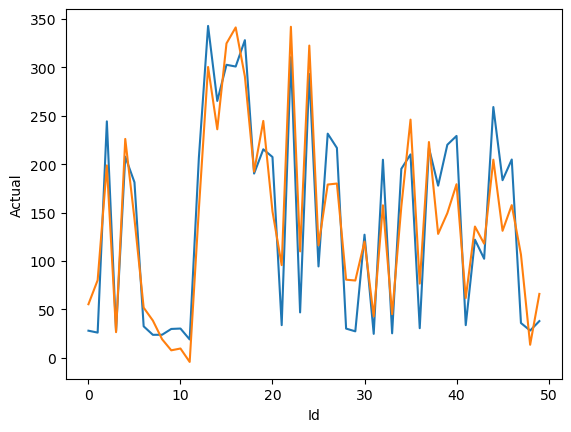

In [30]:
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Actual',data=results.head(50))
sns.lineplot(x='Id',y='Predicted',data=results.head(50))
plt.plot()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
ridge = Ridge()
parameters={'alpha':alpha}
ridge_regressor = GridSearchCV(ridge,parameters)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [32]:
ridge_regressor.best_params_

{'alpha': 30}

In [33]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [34]:
ridge2=Ridge(alpha=30)
ridge2.fit(x_train2,y_train2)
y_pred_ridge2=ridge.predict(x_test2)

In [35]:
ridge3=Ridge(alpha=30)
ridge3.fit(x_train3,y_train3)
y_pred_ridge3=ridge.predict(x_test3)

In [36]:
from sklearn.metrics import mean_squared_error
ridge_error = mean_squared_error(y_pred_ridge,y_test)
ridge_error

1761.2895350328229

In [37]:
from sklearn.metrics import r2_score
r2_score(y_pred_ridge,y_test)

0.8446135156858201

In [38]:
from sklearn.metrics import r2_score
r2_score(y_pred_ridge2,y_test2)

0.8400914078709029

In [39]:
from sklearn.metrics import r2_score
r2_score(y_pred_ridge3,y_test3)

0.8395535411615351

In [40]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_ridge
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,382,28.080000,55.445876,0
1,529,26.100000,80.273765,1
2,1231,244.350006,198.839603,2
3,211,27.600000,26.564454,3
4,1393,207.850006,226.200950,4
5,904,181.410004,143.610217,5
6,361,32.599998,51.899035,6
7,282,23.820000,38.556156,7
8,168,23.889999,19.301874,8
9,100,29.889999,7.816865,9


[]

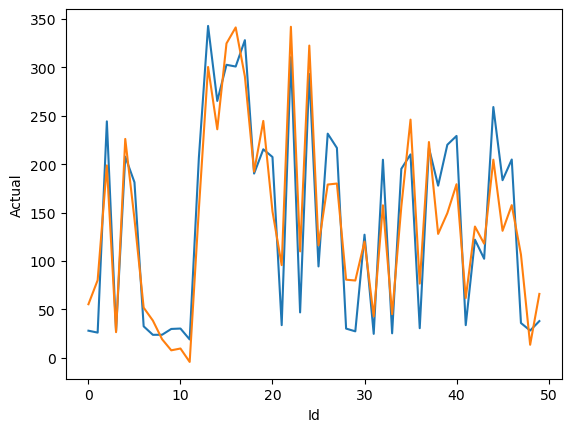

In [41]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [43]:
rf2=RandomForestRegressor(n_estimators=1000,random_state=42)
rf2.fit(x_train2,y_train2)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [44]:
rf3=RandomForestRegressor(n_estimators=1000,random_state=42)
rf3.fit(x_train3,y_train3)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [45]:
RF_pred=rf.predict(x_test)
errors=abs(RF_pred-y_test)

In [46]:
RF_pred2=rf2.predict(x_test2)
errors2=abs(RF_pred2-y_test2)

In [47]:
RF_pred3=rf3.predict(x_test3)
errors3=abs(RF_pred3-y_test3)

In [48]:
RF_pred

array([ 28.24416025,  28.63593998, 246.97887827,  26.8559407 ,
       212.78580769, 176.4420292 ,  32.82823096,  25.03148905,
        23.54303097,  30.94231015,  31.7039696 ,  19.45616004,
       208.08802871, 356.28696327, 252.22327174, 297.90842384,
       301.99235256, 321.95615699, 198.33563278, 218.18280517,
       218.50039212,  34.45952132, 278.36930914,  46.06379108,
       289.57140858,  98.69531206, 240.92327073, 214.01258045,
        28.76814999,  29.10904985, 114.58217178,  24.99397978,
       206.26566409,  24.04591003, 196.77335673, 202.1509914 ,
        31.23982026, 224.6655251 , 172.19154054, 226.28174034,
       230.03311761,  33.61418936, 122.69586732, 102.62196926,
       260.19370039, 183.27445134, 205.61222307,  36.07716056,
        27.47150936,  36.28198154, 197.97942027, 222.96349771,
       309.71865014, 205.52101736,  34.33849968, 229.37113692,
       347.66492373, 216.39146213, 301.36619737,  28.07137928,
        27.19665019, 344.26214043,  28.72319049, 115.16

In [57]:
print('Mean Absolute Error:', round(np.mean(errors),2))

Mean Absolute Error: 3.2


In [58]:
np.mean(errors)

3.2014876548328286

In [50]:
from sklearn.metrics import r2_score
r2_score(RF_pred,y_test)

0.9980686790917024

In [51]:
from sklearn.metrics import r2_score
r2_score(RF_pred2,y_test2)

0.9980146860408631

In [52]:
from sklearn.metrics import r2_score
r2_score(RF_pred3,y_test3)

0.997979674439446

In [53]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=RF_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,382,28.080000,28.244160,0
1,529,26.100000,28.635940,1
2,1231,244.350006,246.978878,2
3,211,27.600000,26.855941,3
4,1393,207.850006,212.785808,4
5,904,181.410004,176.442029,5
6,361,32.599998,32.828231,6
7,282,23.820000,25.031489,7
8,168,23.889999,23.543031,8
9,100,29.889999,30.942310,9


[]

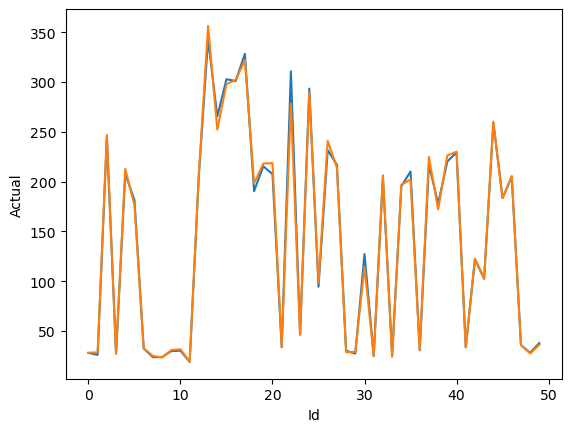

In [54]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

In [56]:
result = pd.read_csv(r"C:\Users\saiga\OneDrive\Documents\Results.csv")
result

,Regression Types Used,Test Data Amount = 33,Test Data Amount = 27,Test Data Amount =22
0,Linear Regression,Acu=0.8687654977642258,0.864324758,0.864450097
1,Ridge Regression,Acu=0.844613515685820,0.840091408,0.839553541
2,Random Forest,Acu=0.9980686790917024,99.80%,99.80%


# Another Way to Table The Values

In [3]:
from Prettytable import PrettyTable
table=PrettyTable()
table.field_names = ["TEST_SIZE","0.33"]
table.add_row(["Logistic",0.8984848484848484])
table.add_row(["DecisionTree",0.9515151515151515])
table.add_row(["RandomForest",0.9393939393939394])
print(table)

ModuleNotFoundError: No module named 'Prettytable'

In [4]:
!pip install Prettytable



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
